## Abalone
* Predict the age of the abalone according to 8 morphological measures
* It is a regression problem
* Data is obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

### Data collection and summary

In [1]:
import sys
import numpy as np
import pandas as pd
# output all in a single cell instead of the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load the data
data = pd.read_csv("Dataset/abalone.data", header=None, sep=",")
data.columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data.head()

# check missing values
data.isna().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [2]:
# A summary of the dataset
data.describe()
data.info()

# For categorical features
data["Sex"].value_counts()


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
ShellWeight      4177 non-null float64
Rings            4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [3]:
# Explore the data before we decide to work on it
# Make sure there is no obvious bias
import matplotlib.pyplot as mpl
data.hist(bins = 50, figsize=(25,10))
mpl.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111e39630>,
      dtype=object)

<Figure size 2500x1000 with 9 Axes>

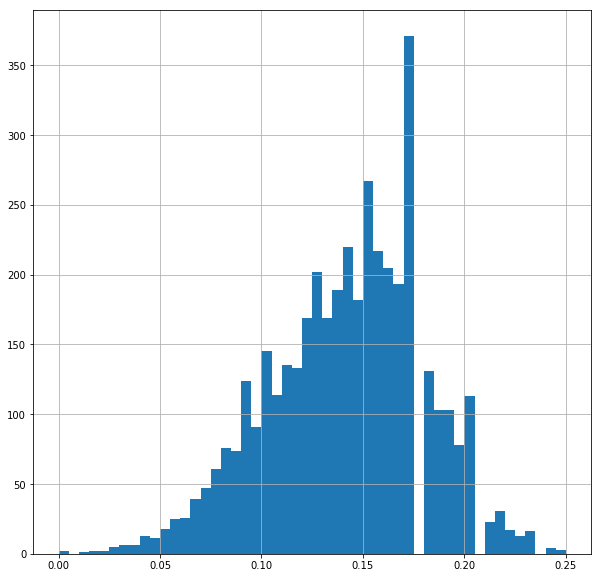

In [4]:
# The attributes in general look fine except Height has outliers which would better to drop
# It is very likely that that is an input error
data = data[data["Height"] < 0.5]
data["Height"].hist(bins=50, figsize=(10,10))
mpl.show()

### Explore the data (Shuffle, split, correlation and visualization)

In [5]:
# It is always good to shuffle the data first (But not on time-series data)
shuffle_index = np.random.permutation(data.index)
data_shuffle = data.reindex(shuffle_index)
data.isna().sum()
data_shuffle.isna().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [6]:
# Split the data to traing and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_shuffle, test_size=0.2, random_state=42)
train.shape
test.shape

(3340, 9)

(835, 9)

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

[Text(0, 1, 'Sex'),
 Text(0, 1, 'Length'),
 Text(0, 1, 'Diameter'),
 Text(0, 1, 'Height'),
 Text(0, 1, 'WholeWeight'),
 Text(0, 1, 'ShuckedWeight'),
 Text(0, 1, 'VisceraWeight'),
 Text(0, 1, 'ShellWeight'),
 Text(0, 1, 'Rings')]

[Text(0, 0, 'Sex'),
 Text(0, 0, 'Length'),
 Text(0, 0, 'Diameter'),
 Text(0, 0, 'Height'),
 Text(0, 0, 'WholeWeight'),
 Text(0, 0, 'ShuckedWeight'),
 Text(0, 0, 'VisceraWeight'),
 Text(0, 0, 'ShellWeight'),
 Text(0, 0, 'Rings')]

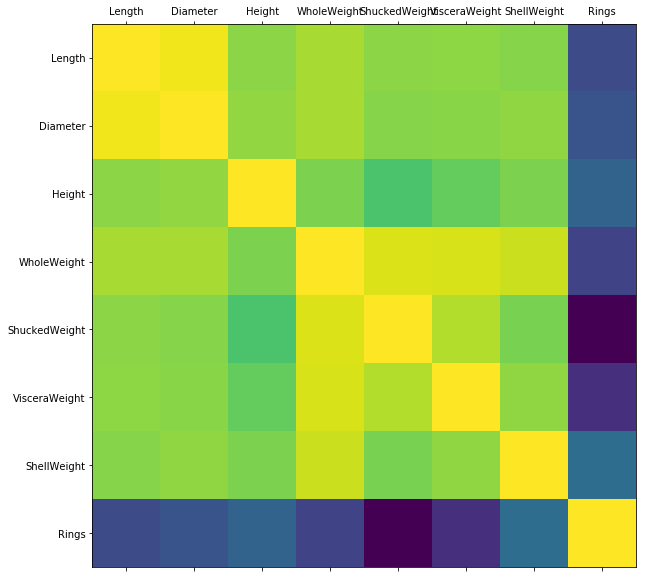

In [7]:
# Correlation among the features
train_tmp = train.copy()
train_tmp.isna().sum()
corr_matrix = train_tmp.corr()

fig = mpl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix)
# add labels
ax.set_xticklabels([''] + train_tmp.columns)
ax.set_yticklabels([''] + train_tmp.columns)

mpl.show()

In [8]:
# sort the correlations
abs(corr_matrix["Rings"]).sort_values(ascending=False)

Rings            1.000000
ShellWeight      0.629725
Height           0.607505
Diameter         0.575120
Length           0.557432
WholeWeight      0.543816
VisceraWeight    0.505371
ShuckedWeight    0.424961
Name: Rings, dtype: float64

It seems Length and Diameters are highly correlated, but Length is more correlated to Rings.  
Since there are only few attributes, there is no need to do feature selection

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Rings')

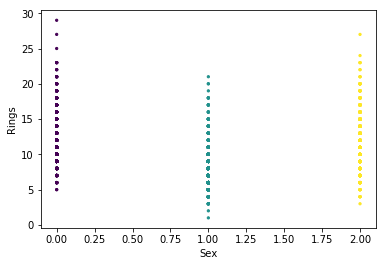

Text(0.5, 0, 'Length')

Text(0, 0.5, 'Rings')

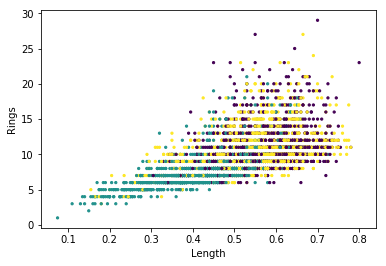

Text(0.5, 0, 'Diameter')

Text(0, 0.5, 'Rings')

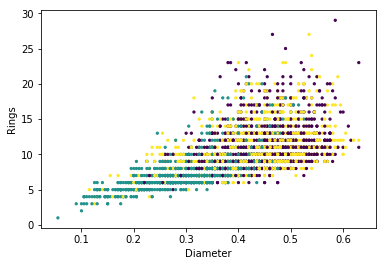

Text(0.5, 0, 'Height')

Text(0, 0.5, 'Rings')

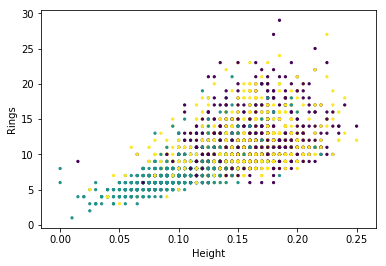

Text(0.5, 0, 'WholeWeight')

Text(0, 0.5, 'Rings')

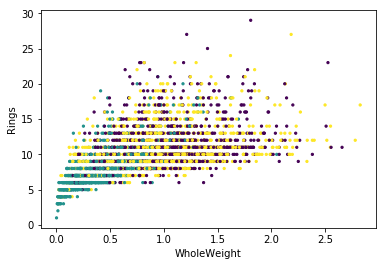

Text(0.5, 0, 'ShuckedWeight')

Text(0, 0.5, 'Rings')

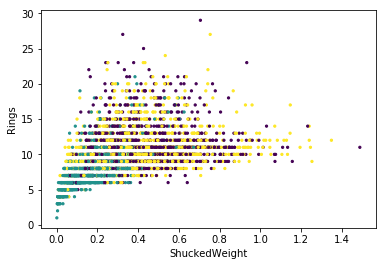

Text(0.5, 0, 'VisceraWeight')

Text(0, 0.5, 'Rings')

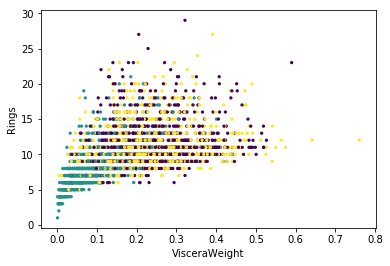

Text(0.5, 0, 'ShellWeight')

Text(0, 0.5, 'Rings')

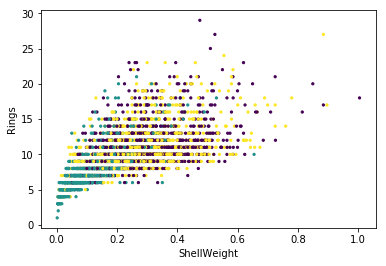

In [9]:
# further make a scatter plot to have an overview of the data; choose the highly correlated features
# Because there are nan in Sex, we need to treat them otherwise we cannot plot
train_tmp.isna().sum()
#train_tmp["Sex"] = train_tmp["Sex"].fillna(value="N")
#train_tmp["Sex"].value_counts()
# Also, c argument in mpl only recognizes values; We need to convert sex to numeric variable
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
train_tmp["Sex"] = encoder.fit_transform(train_tmp[["Sex"]])
# Plot
for f in train_tmp.drop("Rings", axis=1).columns:
  mpl.scatter(train_tmp[f], train_tmp["Rings"], c = train_tmp["Sex"], s = 5, marker = 'o')
  mpl.xlabel(f)
  mpl.ylabel("Rings")
  mpl.show()


I don't see an obvious sample bias in any of the sex. But we need to keep in mind that there are missing values in Sex. Fortunately, only two have missing Sex, we can drop the two instances.

### Data preprocessing (remove missings and feature transformation)

Several things we need to handle before feeding the data to the model:  
* How to deal with missing values
* Whether scale features ot not?
* Transform categorical features  

Putting these steps into a pipeline will bring convinience because they will also be performed on test data later.

In [10]:
# Parepare the data before ML
# remove nan in Sex
train = train.dropna()

train.shape
x_train = train.drop("Rings", axis=1)
y_train = train["Rings"]

x_test = test.drop("Rings", axis=1)
y_test = test["Rings"]

(3340, 9)

Is it necessary to scale the data?  

It depends on the data and which models we are going to use. Some models, like SVM and NN, work best if the inputs are centered and white because their covariance is diagonal and the mean is zero vector. Some other models, like Decision Tree, are non-parametric models which have no predefined assumption. They are more flexible to accept inputs of varied scales.  

It also depends on the data. When the units in the features are meaningful and the distances between the instances make a difference, it is not a good idea to scale the features.
We can always try to train with and without scaling, and make a comparison.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# make two pipelines
# One scales the numeric attributes and encodes the Sex
scaled_pipeline = ColumnTransformer([
  ("numeric", Normalizer(), list(x_train.drop("Sex", axis=1))),
  ("categorical", OneHotEncoder(), ["Sex"]),
])

# One only encodes the Sex
noscaled_pipeline = ColumnTransformer([
  ("categorical", OneHotEncoder(), ["Sex"]),
])

# preprocess the training data
x_train_scaled = scaled_pipeline.fit_transform(x_train)
x_train_noscaled = noscaled_pipeline.fit_transform(x_train)
x_train_scaled

array([[0.56700009, 0.43615392, 0.16200003, ..., 0.        , 1.        ,
        0.        ],
       [0.23606883, 0.19067098, 0.06507025, ..., 1.        , 0.        ,
        0.        ],
       [0.32945182, 0.26071726, 0.09243612, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.4449962 , 0.35442175, 0.14570672, ..., 1.        , 0.        ,
        0.        ],
       [0.50331395, 0.40863113, 0.14949919, ..., 1.        , 0.        ,
        0.        ],
       [0.32913612, 0.24060985, 0.08625636, ..., 1.        , 0.        ,
        0.        ]])

### Select and Train a model/models

According to the overview picture, the problem seems quite linear. We start from a simple linear model w/o Ridge regularization (features are correlated).

In [12]:
# linear
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train_noscaled, y_train)
# Cross validation
from sklearn.model_selection import cross_val_score
lin_cv = cross_val_score(lin, x_train_noscaled, y_train, cv = 10, scoring="neg_mean_squared_error")
lin_cv_RMSE = np.sqrt(-lin_cv)
lin_cv_RMSE.mean()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

2.922934168489901

In [13]:
# It looks not bad
# Test the errors in the test set
from sklearn.metrics import mean_squared_error
x_test_noscaled = noscaled_pipeline.transform(x_test)
x_test_noscaled_predict = lin.predict(x_test_noscaled)
x_test_MSE = mean_squared_error(x_test_noscaled_predict, y_test)
x_test_RMSE = np.sqrt(x_test_MSE)
x_test_RMSE

2.7922058826620115

Scaling or not will not affact so much on the linear model because x and y change proportionally.  
We next try a SVR model on scaled data.

In [14]:
# SVR
from sklearn.svm import LinearSVR
# According to the manual: Prefer dual=False when n_samples > n_features
svr = LinearSVR(epsilon=0.0, loss="squared_epsilon_insensitive", dual = False, random_state=42)
svr.fit(x_train_scaled, y_train)
# fine tune the model with grid search
from sklearn.model_selection import GridSearchCV
param_dist = {
  "epsilon": [0.0, 0.5, 1.0, 1.5],
  "C": [1,10, 100,150, 200] 
}

grid_search = GridSearchCV(svr, param_grid=param_dist, cv = 10, scoring="neg_mean_squared_error")
grid_search.fit(x_train_scaled, y_train)
grid_search.best_estimator_

LinearSVR(C=1.0, dual=False, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='squared_epsilon_insensitive',
     max_iter=1000, random_state=42, tol=0.0001, verbose=0)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=False, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='squared_epsilon_insensitive',
     max_iter=1000, random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epsilon': [0.0, 0.5, 1.0, 1.5], 'C': [1, 10, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

LinearSVR(C=10, dual=False, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='squared_epsilon_insensitive',
     max_iter=1000, random_state=42, tol=0.0001, verbose=0)

In [15]:
# evaluation scores during grid search
grid_search_cv = grid_search.cv_results_
for mean_score, param in zip(grid_search_cv["mean_test_score"], grid_search_cv["params"]):
  print(np.sqrt(-mean_score), param)

2.158557983954013 {'C': 1, 'epsilon': 0.0}
2.163440427134844 {'C': 1, 'epsilon': 0.5}
2.179647691763504 {'C': 1, 'epsilon': 1.0}
2.2202016926973345 {'C': 1, 'epsilon': 1.5}
2.152464036933855 {'C': 10, 'epsilon': 0.0}
2.159166050674435 {'C': 10, 'epsilon': 0.5}
2.167439538480078 {'C': 10, 'epsilon': 1.0}
2.1924881287901146 {'C': 10, 'epsilon': 1.5}
2.154668483750004 {'C': 100, 'epsilon': 0.0}
2.1579559057315687 {'C': 100, 'epsilon': 0.5}
2.1704183239307686 {'C': 100, 'epsilon': 1.0}
2.192472121147448 {'C': 100, 'epsilon': 1.5}
2.1547075601632284 {'C': 150, 'epsilon': 0.0}
2.1580682687693185 {'C': 150, 'epsilon': 0.5}
2.1704846911996936 {'C': 150, 'epsilon': 1.0}
2.193799353189939 {'C': 150, 'epsilon': 1.5}
2.1547311109709786 {'C': 200, 'epsilon': 0.0}
2.1581159402237438 {'C': 200, 'epsilon': 0.5}
2.170513190006551 {'C': 200, 'epsilon': 1.0}
2.1937312456999685 {'C': 200, 'epsilon': 1.5}


In [16]:
# The training error is lower in svr than linear regressor, how about the test error?
svr_best_param = grid_search.best_estimator_
x_test_scaled = scaled_pipeline.transform(x_test)
x_test_scaled_predict = svr_best_param.predict(x_test_scaled)
x_test_scaled_MSE = mean_squared_error(x_test_scaled_predict, y_test)
x_test_scaled_RMSE = np.sqrt(x_test_scaled_MSE)
x_test_scaled_RMSE

2.255358654009182

(0, 25)

(0, 25)

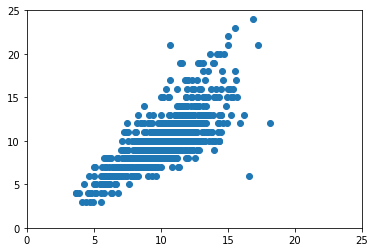

In [17]:
mpl.scatter(x_test_scaled_predict, y_test)
mpl.xlim(0,25)
mpl.ylim(0,25)